In [10]:
from sage.all import *

In [11]:
#Returns the volume of G

def vol(G):
    V = 0
    for v in G.vertices():
        V+=G.degree(v)
    return V

In [12]:
#Returns the degree matrix D of graph G

def deg_matrix(G):
    return diagonal_matrix([G.degree(v) for v in G.vertices()], sparse = False)

In [13]:
#returns Ihara Matrix of G

def ihara_matrix(G):
    A = G.adjacency_matrix(); D=deg_matrix(G); I = identity_matrix(G.order()); Z=matrix.zero(G.order())
    return block_matrix(QQbar, [[A,D-I],[-I,Z]], subdivide = false)

In [14]:
#Returns the normal transition probabillity matrix P of graph G

def trans_prob_matrix(G):
    A = G.adjacency_matrix()
    D= diagonal_matrix([G.degree(v) for v in G.vertices()])
    Dinv = D^(-1)
    P = Dinv * A
    return P

In [15]:
def edge_ordering_dictionary(G):
    D=dict()
    i=0
    for u in G.vertices():
        for v in G.neighbors(u):
            D.setdefault((u,v),i)
            i=i+1
    return D

In [16]:
#Creates probability matrix of the non-backtracking matrix 

def trans_prob_matrix_nb(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(float(1)/(G.degree(v)-1))
            else: L.append(0)
    P = matrix(vol(G), L)
    return P

In [17]:
#Creates normal edge adjacency matrix C for any graph G

def edge_adjacency_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L)
    return B

In [18]:
#creates non-backtracking matrix B for any graph G

def edge_adjacency_nb_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L) 
    return B

In [19]:
#uses proposition 5.3 to calculate eigenvalues of Ihara Matrix from A

def compute_K_evals(G):
    K = ihara_matrix(G)
    for A_evec in G.eigenvectors():
        print("lambda: " + str(A_evec[0]))
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            print("Actual mu: " + str(mu))
            G1 = A_evec
            lam = G1[0]
            x_vectors = G1[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                B_evec = K_evec[1]
                for K_evec_same_eval in B_evec:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            print("CORRECT")
                        else:
                            print("INCORRECT")
                    else: 
                        print("x and y are orthogonal")
        print()

In [20]:
#Tries to find all eigenvalues of Ihara Matrix using Proposition 5.3. If not all are found, 
# it prints off the graph of G and a list of eigenvalues that weren't calculated.

#Takes a long time

def find_eigenvalues(G):    
    K = ihara_matrix(G)
    set_of_evals = list(K.eigenvalues())
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            lam = A_evec[0]
            x_vectors = A_evec[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                K_evectors = K_evec[1]
                for K_evec_same_eval in K_evectors:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            if mu in set_of_evals:
                                set_of_evals.remove(mu)
    if len(set_of_evals) == 0:
        print("All eigenvalues found")
    else:
        print("These eigenvalues were not found: " + str(set_of_evals))
        show(G)

In [21]:
#returns list of eigenvectors corresponding to jth eigenvalue

def get_ihara_evec(G,j):
    K = ihara_matrix(G)
    K_i = K.eigenvectors_right()[j]
    K_i_evec = K_i[1]
    return K_i_evec

In [22]:
#tells you if the Ihara matrix is diagonalizable

def is_it_diagonalizable(list_of_graphs):
    for g in list_of_graphs:
        k = ihara_matrix(g)
        if k.is_diagonalizable() == False:
            show(g)
            #for d in g.degree_iterator():
            #    if d == 1:
            #        show(g)
        #else:
            #print("FALSE")

In [106]:
#tests cospectrality in regards to \rho matrices and Ihara matrix

def are_cospectral(g1,g2):
    print("these are the adjacency matrix spectrums: ")
    print(g1.spectrum())
    print(g2.spectrum())
    print()


    print("these are the laplacian spectrums: ")
    print(g1.kirchhoff_matrix().eigenvalues())
    print(g2.kirchhoff_matrix().eigenvalues())
    print()


    print("these are the normalized laplacian spectrums: ")
    print(g1.kirchhoff_matrix(normalized = True).eigenvalues())
    print(g2.kirchhoff_matrix(normalized = True).eigenvalues())
    print()


    print("these are the signless laplacian spectrums: ")
    print(g1.kirchhoff_matrix(signless = True).eigenvalues())
    print(g2.kirchhoff_matrix(signless = True).eigenvalues())
    print()

    print("these are the ihara matrix spectrums: ")
    print(ihara_matrix(g1).eigenvalues())
    print(ihara_matrix(g2).eigenvalues())

In [100]:
def GM_switch(g1,g2,C):
    if g1.is_regular() != True:
        print("Graph 1 is not regular")
        return
    else:
        J = ones_matrix(g1.order(), g2.order())
        AG = block_matrix(QQbar, [[g1.adjacency_matrix(),C],[C.transpose(),g2.adjacency_matrix()]], subdivide = false)
        AH = block_matrix(QQbar, [[g1.adjacency_matrix(),J - C],[J.transpose() - C.transpose(),g2.adjacency_matrix()]], subdivide = false)
        G = Graph(AG)
        H = Graph(AH)
        return G,H

hello


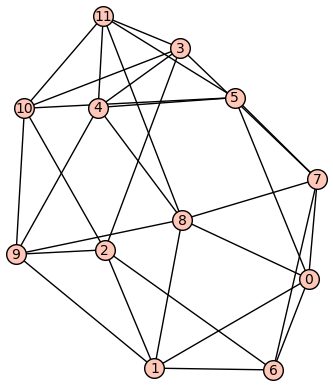

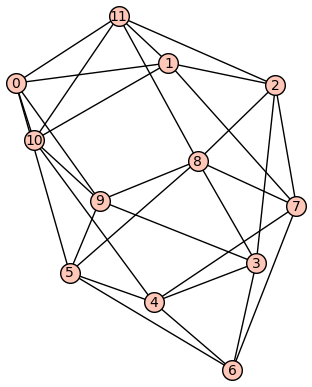

graphs one and two are isomorphic: False

these are the adjacency matrix spectrums: 
[5.035934743341465?, 2.485691780829222?, 1.926435089857785?, 1.279394094812944?, 0.2449086497923679?, -0.4114180146547389?, -0.5191923901927031?, -1.129832773726302?, -1.605568132963038?, -1.800158494620606?, -2.328916004905041?, -3.177278547571357?]
[5.035934743341465?, 2.485691780829222?, 1.926435089857785?, 1.279394094812944?, 0.2449086497923679?, -0.4114180146547389?, -0.5191923901927031?, -1.129832773726302?, -1.605568132963038?, -1.800158494620606?, -2.328916004905041?, -3.177278547571357?]

these are the laplacian spectrums: 
[6, 0, 2.281068725790378?, 3.090606692126515?, 4.774597726516888?, 5.225193273242555?, 5.533627322406659?, 6.571582698901306?, 6.874136710425467?, 7.500885801104694?, 8.31368892907090?, 3.834612120414644? + 0.?e-62*I]
[6, 0, 2.281068725790378?, 3.090606692126515?, 4.774597726516888?, 5.225193273242555?, 5.533627322406659?, 6.571582698901306?, 6.874136710425467?, 7.500885801

In [121]:
#Generated all-cospectral graphs using two graphs on 6 vertices

C = matrix([[1,1,1,0,0,0], [1,0,1,1,0,0], [1,0,0,1,1,0], [0,1,0,0,1,1], [0,0,1,1,0,1], [0,1,0,0,1,1]])
g1 = Graph({0:[1,5], 4:[5,3], 2:[1,3]})
g2 = Graph({5:[2,4], 3:[2,4], 1:[0,2]})
print("hello")
graphs = GM_switch(g1,g2,C)
for G in graphs:
    show(G)

g1 = graphs[0]
g2 = graphs[1]

print("graphs one and two are isomorphic: " + str(g1.is_isomorphic(g2)))
print()

#are_cospectral(graphs[0],graphs[1])

print("these are the adjacency matrix spectrums: ")
print(g1.spectrum())
print(g2.spectrum())
print()


print("these are the laplacian spectrums: ")
print(g1.kirchhoff_matrix().eigenvalues())
print(g2.kirchhoff_matrix().eigenvalues())
print()


#print("these are the normalized laplacian spectrums: ")
#print(g1.kirchhoff_matrix(normalized = True).eigenvalues())
#print(g2.kirchhoff_matrix(normalized = True).eigenvalues())
#print()


print("these are the signless laplacian spectrums: ")
print(g1.kirchhoff_matrix(signless = True).eigenvalues())
print(g2.kirchhoff_matrix(signless = True).eigenvalues())
print()


print("these are the ihara matrix spectrums: ")
print(ihara_matrix(g1).eigenvalues())
print(ihara_matrix(g2).eigenvalues())

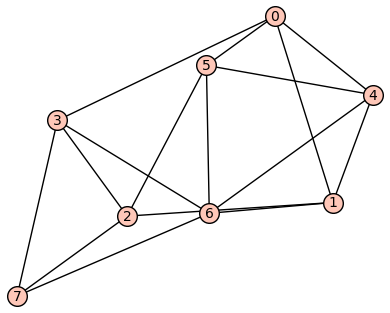

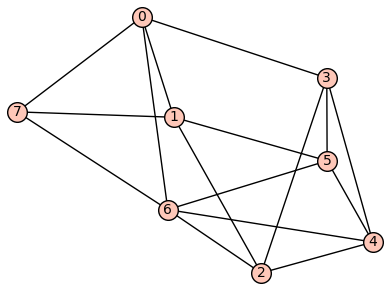

True
these are the adjacency matrix spectrums: 
[4.054156981155888?, 1.529556814050105?, 0.2030291350678458?, 0, 0, -1.173359774543222?, -1.543598836533737?, -3.069784319196880?]
[4.054156981155888?, 1.529556814050105?, 0.2030291350678458?, 0, 0, -1.173359774543222?, -1.543598836533737?, -3.069784319196880?]

these are the laplacian spectrums: 
[5, 0, 4, 4, 4, 2.104893484072469?, 5.602704930702910?, 7.292401585224621?]
[5, 0, 4, 4, 4, 2.104893484072469?, 5.602704930702910?, 7.292401585224621?]

these are the normalized laplacian spectrums: 
[1, 1, 0]
[1, 1, 0]

these are the signless laplacian spectrums: 
[4, 4, 1.037940772323164?, 2.115205055811098?, 2.656902589565021?, 4.68480515122703?, 5.295252765661715?, 8.20989366541198? + 0.?e-95*I]
[4, 4, 1.037940772323164?, 2.115205055811098?, 2.656902589565021?, 4.68480515122703?, 5.295252765661715?, 8.20989366541198? + 0.?e-95*I]

these are the ihara matrix spectrums: 
[3.037235326212268?, 1, 0.7515903008871687? + 1.448696953161461?*I, 0.751

In [116]:
#Generated all-cospectral graphs using two graphs on 4 vertices. Unfortunately, they are isomorphic


C = matrix([[1,1,0,0], [1,0,1,0], [0,1,0,1], [0,0,1,1]])

g1 = Graph({0:[1,3], 2:[1,3]})
g2 = Graph({0:[1,2], 2:[1,3]})

graphs = GM_switch(g1,g2,C)
for G in graphs:
    show(G)

g1 = graphs[0]
g2 = graphs[1]

print(g1.is_isomorphic(g2))

#are_cospectral(graphs[0],graphs[1])

print("these are the adjacency matrix spectrums: ")
print(g1.spectrum())
print(g2.spectrum())
print()


print("these are the laplacian spectrums: ")
print(g1.kirchhoff_matrix().eigenvalues())
print(g2.kirchhoff_matrix().eigenvalues())
print()


print("these are the normalized laplacian spectrums: ")
print(g1.kirchhoff_matrix(normalized = True).eigenvalues())
print(g2.kirchhoff_matrix(normalized = True).eigenvalues())
print()


print("these are the signless laplacian spectrums: ")
print(g1.kirchhoff_matrix(signless = True).eigenvalues())
print(g2.kirchhoff_matrix(signless = True).eigenvalues())
print()


print("these are the ihara matrix spectrums: ")
print(ihara_matrix(g1).eigenvalues())
print(ihara_matrix(g2).eigenvalues())

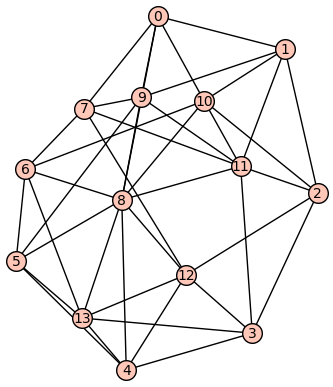

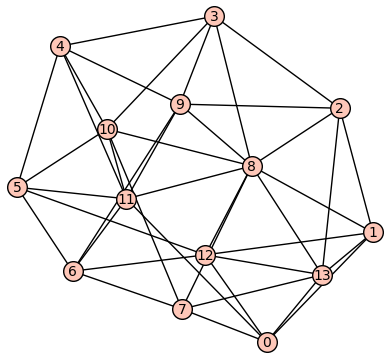

False
these are the adjacency matrix spectrums: 
[5.907962046204448?, 3.174785222103151?, 2.248025285709206?, 1.027218915974423?, 0.6454807246343314?, 0.2155548172162936?, -0.4153855796873844?, -0.6842666230006266?, -1.062037887435707?, -1.263150907597834?, -1.955005345069284? + 0.?e-42*I, -2.182880089560484?, -2.329804308423348?, -3.326496271067184?]
[5.907962046204448?, 3.174785222103151?, 2.248025285709206?, 1.027218915974423?, 0.6454807246343314?, 0.2155548172162936?, -0.4153855796873844?, -0.6842666230006266?, -1.062037887435707?, -1.263150907597834?, -1.955005345069284? + 0.?e-42*I, -2.182880089560484?, -2.329804308423348?, -3.326496271067184?]

these are the laplacian spectrums: 
[7, 0, 2.281501673778834?, 3.062211999954463?, 4.359119434028927?, 4.565068009487016?, 5.372495583936739?, 6.045506574865727?, 6.352350487070847?, 6.465031007800030?, 7.630410384567283?, 7.745954904164577?, 8.56064320853648?, 10.55970673180909?]
[7, 0, 2.281501673778834?, 3.062211999954463?, 4.359119434

In [118]:
#Generated all-cospectral graphs using two graphs on 8 and 6 vertices


C = matrix([[1,1,1,0,0,0], [0,1,1,1,0,0], [0,0,1,1,1,0], [0,0,0,1,1,1], [1,0,0,0,1,1], [1,1,0,0,0,1], [1,0,1,0,0,1], [0,1,0,1,1,0]])
g1 = Graph({0:[1,7], 2:[1,3], 4:[3,5], 6:[5,7]})
g2 = Graph({0:[1,2,3,4,5], 3:[1,2], 4:[5]})

graphs = GM_switch(g1,g2,C)
for G in graphs:
    show(G)

g1 = graphs[0]
g2 = graphs[1]

print(g1.is_isomorphic(g2))

#are_cospectral(graphs[0],graphs[1])

print("these are the adjacency matrix spectrums: ")
print(g1.spectrum())
print(g2.spectrum())
print()


print("these are the laplacian spectrums: ")
print(g1.kirchhoff_matrix().eigenvalues())
print(g2.kirchhoff_matrix().eigenvalues())
print()


#print("these are the normalized laplacian spectrums: ")
#print(g1.kirchhoff_matrix(normalized = True).eigenvalues())
#print(g2.kirchhoff_matrix(normalized = True).eigenvalues())
#print()


print("these are the signless laplacian spectrums: ")
print(g1.kirchhoff_matrix(signless = True).eigenvalues())
print(g2.kirchhoff_matrix(signless = True).eigenvalues())
print()


print("these are the ihara matrix spectrums: ")
print(ihara_matrix(g1).eigenvalues())
print(ihara_matrix(g2).eigenvalues())

In [49]:
#Testing cospectrality of graphs on minimum 2 degrees

all_spectrums = []
all_graphs = list(graphs.nauty_geng("9 -d2"))
for g in all_graphs:
    k_g = ihara_matrix(g)
    all_spectrums.append(k_g.eigenvalues())

graphs_length = len(all_spectrums)
for i in range (0,graphs_length):
    for j in range(0,graphs_length):
        if i != j and all_spectrums[i] == all_spectrums[j]:
            show(all_graphs[i])
            show(all_graphs[j])

KeyboardInterrupt: 

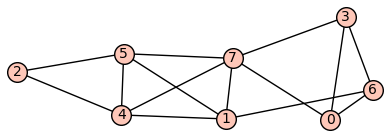

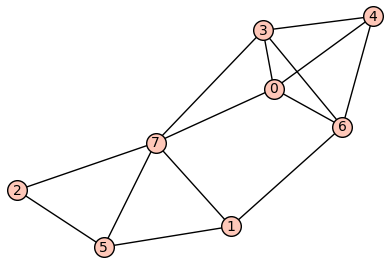

these are the adjacency matrix spectrums: 
[3.721777979069680?, 2.040851187045480?, 0.2029667552813687?, 0, -1, -1, -1.783895852615880?, -2.181700068780649?]
[3.706292280858517?, 2.081781732402062?, 0.3990065463198300?, -0.3773774530379134?, -1, -1, -1.474129194077757?, -2.335573912464739?]

these are the laplacian spectrums: 
[5, 4, 0, 0.9801596971544924?, 2.720867696609051?, 3.419853606105204?, 5.501362541613759?, 6.377756458517494?]
[1, 0, 5, 5, 4, 4, 2.438447187191170?, 6.561552812808830?]

these are the normalized laplacian spectrums: 
[5/4, 4/3, -1/2160*sqrt((1166400*(1/11664000*I*sqrt(22577707)*sqrt(30) + 22490227/1259712000)^(2/3) + 411345*(1/11664000*I*sqrt(22577707)*sqrt(30) + 22490227/1259712000)^(1/3) + 80089)/(1/11664000*I*sqrt(22577707)*sqrt(30) + 22490227/1259712000)^(1/3)) - 1/2*sqrt(-(1/11664000*I*sqrt(22577707)*sqrt(30) + 22490227/1259712000)^(1/3) - 80089/1166400/(1/11664000*I*sqrt(22577707)*sqrt(30) + 22490227/1259712000)^(1/3) + 5751/32/sqrt((1166400*(1/11664000*I*

In [105]:
# IMPORTANT: FIND MORE COUNTER EXAMPLES AND TEST HYPOTHESIS

#Counter example is only cospectral in regards to signless laplacian and ihara matrix. 
#We later show that cospectrality in terms of signless laplacian does not imply cospectrality in terms of ihara matrix, but the converse may be true

#Counter example to our 'conjecture' about cospectrality of B or K matrices

g1 = {0:[3,6,7], 6:[3,1], 7:[3,1,5,4], 4:[1,5,2], 5:[1,2]}
g1 = Graph(g1)
show(g1)

g2 = {0:[3,4,6,7], 3:[4,6,7], 6:[4,1], 5:[1,2,7], 7:[1,2]}
g2 = Graph(g2)
show(g2)

print("these are the adjacency matrix spectrums: ")
print(g1.spectrum())
print(g2.spectrum())
print()


print("these are the laplacian spectrums: ")
print(g1.kirchhoff_matrix().eigenvalues())
print(g2.kirchhoff_matrix().eigenvalues())
print()


print("these are the normalized laplacian spectrums: ")
print(g1.kirchhoff_matrix(normalized = True).eigenvalues())
print(g2.kirchhoff_matrix(normalized = True).eigenvalues())
print()


print("these are the signless laplacian spectrums: ")
print(g1.kirchhoff_matrix(signless = True).eigenvalues())
print(g2.kirchhoff_matrix(signless = True).eigenvalues())
print()

print("these are the ihara matrix spectrums: ")
print(ihara_matrix(g1).eigenvalues())
print(ihara_matrix(g2).eigenvalues())


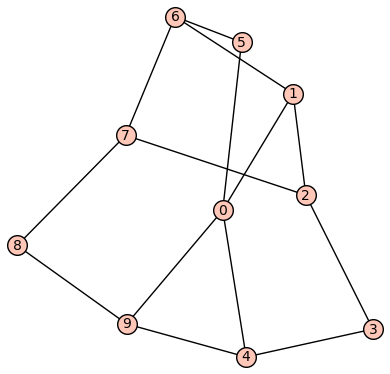

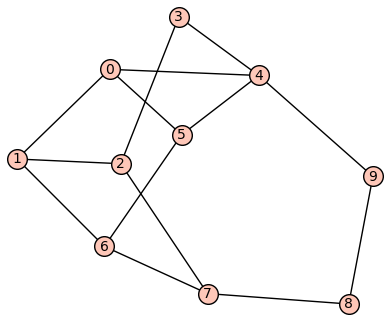

Signless laplacian spectrums: 
[4, 0.2126043849661892?, 0.8103540705201253?, 1.235293312632125?, 1.821857086096314?, 2.40365616743203?, 2.86542561447067?, 3.67313211663884?, 4.88959430634255?, 6.088082940901173?]
[4, 0.2126043849661892?, 0.8103540705201253?, 1.235293312632125?, 1.821857086096314?, 2.40365616743203?, 2.86542561447067?, 3.67313211663884?, 4.88959430634255?, 6.088082940901173?]
Ihara matrix spectrums: 
[1.856232060144458?, 1, 0.875033833343860? + 1.141486321786018?*I, 0.875033833343860? - 1.141486321786018?*I, 0.6189713903828407? + 1.051771981799156?*I, 0.6189713903828407? - 1.051771981799156?*I, 0.517839769393341? + 1.042765138433336?*I, 0.517839769393341? - 1.042765138433336?*I, 0.06445289654937190? + 1.276861834856776?*I, 0.06445289654937190? - 1.276861834856776?*I, -0.3002884190293937? + 1.270031800551323?*I, -0.3002884190293937? - 1.270031800551323?*I, -0.500000000000000? + 1.322875655532296?*I, -0.500000000000000? - 1.322875655532296?*I, -0.525557094701636? + 1.0951

In [95]:
# FINDINGS: being cospectral in regards to signless laplacian does NOT imply cospectrality in regards to Ihara matrix

#Two graphs on 10 vertices which are cospectral in terms of Q (signless laplacian) matrix

g1 = {0:[1,4,5,9], 6:[1,5,7], 2:[1,3,7], 8:[7,9], 4:[3,9]}
g2 = {0:[1,4,5], 6:[1,5,7], 2:[1,3,7], 8:[7,9], 4:[3,5,9]}

g1 = Graph(g1)
g2 = Graph(g2)

show(g1)
show(g2)

Q_g1 = g1.kirchhoff_matrix(signless=True)
Q_g2 = g2.kirchhoff_matrix(signless=True)

print("Signless laplacian spectrums: ")
print(Q_g1.eigenvalues())
print(Q_g2.eigenvalues())

K_g1 = ihara_matrix(g1)
K_g2 = ihara_matrix(g2)

print("Ihara matrix spectrums: ")
print(K_g1.eigenvalues())
print(K_g2.eigenvalues())

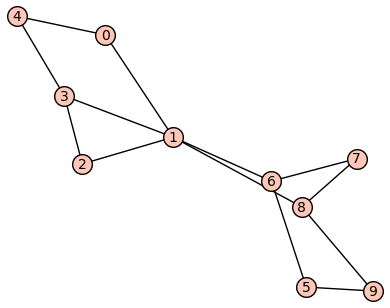

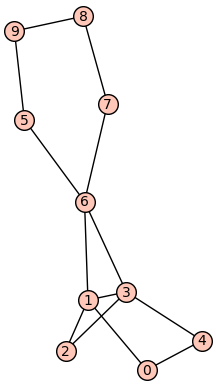

Signless laplacian spectrums: 
[0.5857864376269049?, 3.414213562373095?, 0.3819660112501051?, 2.618033988749895?, 0.7247676354842017?, 1.351786674876398?, 2.737020955892957?, 3.206925220142892?, 4.350226436508329?, 6.629273077095223?]
[0.5857864376269049?, 3.414213562373095?, 0.3819660112501051?, 2.618033988749895?, 0.7247676354842017?, 1.351786674876398?, 2.737020955892957?, 3.206925220142892?, 4.350226436508329?, 6.629273077095223?]
Ihara matrix spectrums: 
[1.712910089774997?, 1, 0.9054706079317342? + 0.6771759330495394?*I, 0.9054706079317342? - 0.6771759330495394?*I, 0.3653592822951767? + 0.9905092462221839?*I, 0.3653592822951767? - 0.9905092462221839?*I, 0.3071862534852195? + 1.003796392622913?*I, 0.3071862534852195? - 1.003796392622913?*I, 0.2808963518663595? + 1.274407846935386?*I, 0.2808963518663595? - 1.274407846935386?*I, -0.06601641082782834? + 1.392667560103945?*I, -0.06601641082782834? - 1.392667560103945?*I, -0.4256551916908333? + 1.061477080046101?*I, -0.4256551916908333

In [98]:
#Another counter-example like the previous

g1 = {0:[4], 1:[0,2,3,6,8], 3:[2,4], 5:[6,9], 7:[6,8], 9:[8]}
g2 = {0:[4], 1:[0,2,3,6], 3:[2,4,6], 5:[6,9], 7:[6,8], 9:[8]}

g1 = Graph(g1)
g2 = Graph(g2)

show(g1)
show(g2)

Q_g1 = g1.kirchhoff_matrix(signless=True)
Q_g2 = g2.kirchhoff_matrix(signless=True)

print("Signless laplacian spectrums: ")
print(Q_g1.eigenvalues())
print(Q_g2.eigenvalues())

K_g1 = ihara_matrix(g1)
K_g2 = ihara_matrix(g2)

print("Ihara matrix spectrums: ")
print(K_g1.eigenvalues())
print(K_g2.eigenvalues())

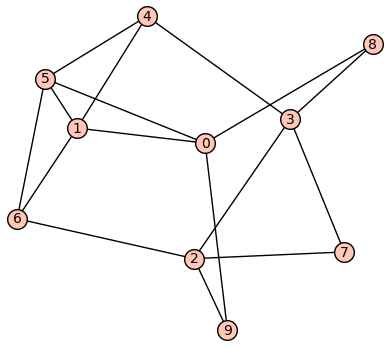

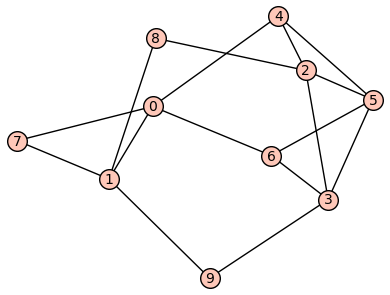

Signless laplacian spectrums: 
[3, 1.198062264195162?, 2.554958132087371?, 4.246979603717467?, 0.8392386110650277?, 1.144066275803944?, 1.907979970135395?, 4.321381451782160?, 5.717606853150673?, 7.069726838062800?]
[3, 1.198062264195162?, 2.554958132087371?, 4.246979603717467?, 0.8392386110650277?, 1.144066275803944?, 1.907979970135395?, 4.321381451782160?, 5.717606853150673?, 7.069726838062800?]
Ihara matrix spectrums: 
[2.337175351829791?, 1, 0.9811846886166863? + 1.134096891468766?*I, 0.9811846886166863? - 1.134096891468766?*I, 0.4691977498046896? + 1.266116231252364?*I, 0.4691977498046896? - 1.266116231252364?*I, 0.3962058779961855? + 1.328256269924611?*I, 0.3962058779961855? - 1.328256269924611?*I, 0.04418347828493740? + 1.159872798700702?*I, 0.04418347828493740? - 1.159872798700702?*I, -0.1529084874280008? + 1.157988751288298?*I, -0.1529084874280008? - 1.157988751288298?*I, -0.500000000000000? + 1.658312395177700?*I, -0.500000000000000? - 1.658312395177700?*I, -0.867392426598360

In [99]:
# ANOTHER NON-REGULAR GRAPH WHICH IS COSPECTRAL IN REGARDS TO IHARA MATRIX WITH MIN DEGREE 2

#Example from paper Dr. Kempton sent us 

g1 = {0:[1,5,8,9], 1:[4,5,6], 2:[3,6,7,9], 3:[4,7,8], 5:[4,6]}
g2 = {0:[1,4,6,7], 1:[7,8,9], 2:[4,5,8,3], 3:[5,6,9], 5:[4,6]}

g1 = Graph(g1)
g2 = Graph(g2)

show(g1)
show(g2)

Q_g1 = g1.kirchhoff_matrix(signless=True)
Q_g2 = g2.kirchhoff_matrix(signless=True)

print("Signless laplacian spectrums: ")
print(Q_g1.eigenvalues())
print(Q_g2.eigenvalues())

K_g1 = ihara_matrix(g1)
K_g2 = ihara_matrix(g2)

print("Ihara matrix spectrums: ")
print(K_g1.eigenvalues())
print(K_g2.eigenvalues())

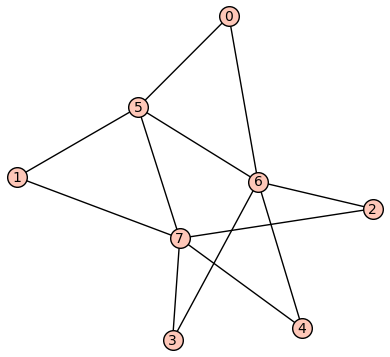

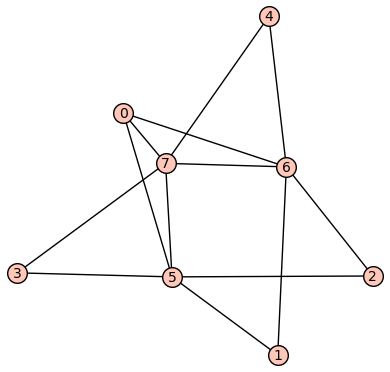

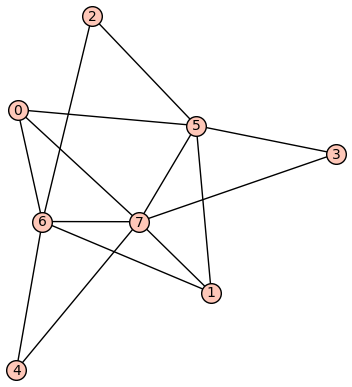

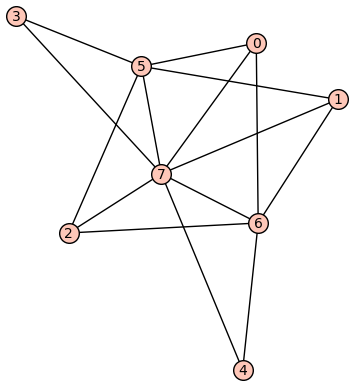

ValueError: intersection of non-overlapping intervals

In [62]:
#Testing diagonalizability of Ihara Matrix of graphs with 8 vertices, connected, and d_min >= 2


all_graphs = graphs.nauty_geng("8 8:0 -c -d2")
#print(len(list(list_of_graphs)))
#for g in all_graphs:
#    find_eigenvalues(g)
is_it_diagonalizable(all_graphs)

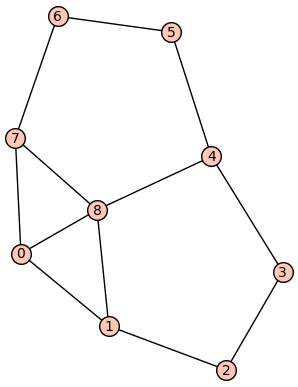

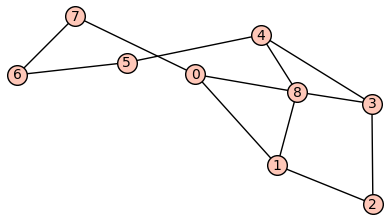

NOT cospectral in regards to non-backtracking matrices
NOT cospectral in regards to ihara matrices
x^18 + 3*x^16 - 4*x^15 + 4*x^14 - 16*x^13 + 4*x^12 - 36*x^11 + 4*x^10 - 56*x^9 + 8*x^8 - 56*x^7 + 36*x^6 - 40*x^5 + 60*x^4 - 16*x^3 + 56*x^2 + 48
x^18 + 3*x^16 - 4*x^15 + 4*x^14 - 16*x^13 + 2*x^12 - 36*x^11 + 2*x^10 - 52*x^9 + 12*x^8 - 48*x^7 + 33*x^6 - 36*x^5 + 47*x^4 - 16*x^3 + 56*x^2 + 48


In [91]:
#example of two cospectral graphs with minimum degree at least 2

g1 = {0:[1,7,8], 1:[8,2], 3:[2,4], 5:[4,6], 7:[6,8], 8:[4]}
g1 = Graph(g1)
show(g1)
g2 = {0:[1,7,8], 1:[8,2], 3:[2,8,4], 5:[4,6], 7:[6], 8:[4]}
g2 = Graph(g2)
show(g2)
are_cospectral(g1,g2)
k_g1 = ihara_matrix(g1)
k_g2 = ihara_matrix(g2)

print(k_g1.charpoly())
print(k_g2.charpoly())

#print(k_g1.eigenvalues())

#print(k_g2.eigenvalues())

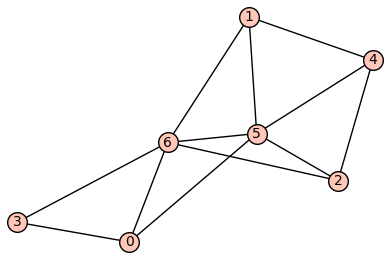

Is diagonalizable: False
[2.585399180895620?, 1, 0.6337669124478448? + 1.141714069356906?*I, 0.6337669124478448? - 1.141714069356906?*I, 0.?e-56 + 1.414213562373095?*I, 0.?e-56 - 1.414213562373095?*I, -0.3757575197436938? + 1.706562943488307?*I, -0.3757575197436938? - 1.706562943488307?*I, -1.050708983151961? + 1.128326170159466?*I, -1.050708983151961? - 1.128326170159466?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I]


KeyboardInterrupt: 

In [17]:
#reconstructing the counter-example to our conjecture about the diagonalizability of Ihara matrices


g = {0:[3,6,5], 1:[4,5,6], 2:[4,5,6], 3:[0,6], 4:[1,2,5], 5:[0,1,2,4,6], 6:[0,3,5]}
sad_graph = Graph(g)
show(sad_graph)
k_sad = ihara_matrix(sad_graph)
print("Is diagonalizable: " + str(k_sad.is_diagonalizable()))
print(k_sad.eigenvalues())
find_eigenvalues(sad_graph)

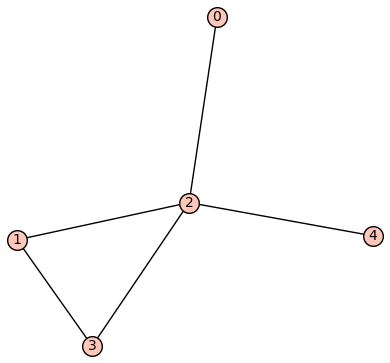

[0 0 1 0 0]
[0 0 1 1 0]
[1 1 0 1 1]
[0 1 1 0 0]
[0 0 1 0 0]

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 1 0 1 1 0 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0]


In [73]:
#Testing several different graphs to see if they preserve their property of having an equitable partition


#G = Graph({})
#G.add_cycle([0,1,2,3])
#G.add_cycle([4,5,6,7])
#G.add_edges([(0,4),(1,5),(2,6),(3,7)])

G = graphs.CompleteBipartiteGraph(3,3)

G = DiGraph(edge_adjacency_nb_matrix(G))

print(G.is_equitable([[0,1],[2],[3,4]]))

#G = Graph({7:[0,1,3,5,6], 1:[0,2,3,5], 3:[2,4,5], 5:[4,6]})

#G = Graph({0:[1,2,3,6], 7:[1,4,5,6], 1:[2,4], 6:[3,5], 2:[3,4], 5:[3,4]})

#G = Graph({2:[0,1,3,4], 3:[1]})

show(G)
#print(G.adjacency_matrix())
#print()
#print(edge_adjacency_nb_matrix(G))

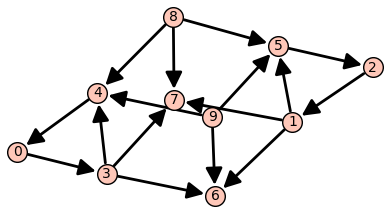

[[0, 2], [1, 3], [4, 5], [6, 7], [8, 9]]


In [88]:
#checking if nonbacktracking graph has an equitable partition

G = Graph({2:[0,1,3,4], 0:[1]})
#print(edge_adjacency_nb_matrix(G))
G = DiGraph(edge_adjacency_nb_matrix(G))
show(G)
print(G.coarsest_equitable_refinement([[0,2],[1,3],[4,5],[6,7],[8,9]]))
#G.is_equitable([[0,1],[2],[3,4]])
#G.is_equitable(P, quotient_matrix=True)

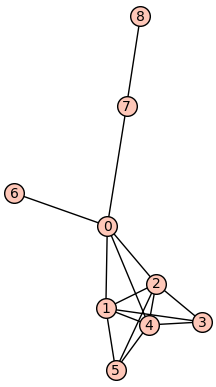

Ihara matrix is diagonalizable: False
[0, -1, -1, -2.432275894706459?, -1.239782941132468?, -0.5653180558400381?, 0.5820380767824201?, 1.431748412515937?, 4.223590402380607?]
lambda: 0
Actual mu: 3.111694220928247?
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119?*I
x and y are orthogonal
Actual mu: -1.055847110464124? - 1.206703601948119?*I
x and y are orthogonal
Actual mu: 0.?e-76 + 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: 0.?e-76 - 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: -0.500000000000000? + 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: -0.500000000000000? - 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: 0
x and y are orthogonal
x and y are orthogonal

lambda: -1
Actual mu: 3.111694220928247?
x and y are orthogonal
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119

In [19]:
#An example of proposition 5.3 calculating the eigenvalues of the Ihara Matrix of some graph on 9 vertices

G = deg_two_graph(6,0.5)
G.add_vertices([6, 7, 8])
G.add_edges([(6,0),(7,0),(8,7)])
show(G)
K = ihara_matrix(G)
print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
print(G.adjacency_matrix().eigenvalues())
compute_K_evals(G)

cospectral in regards to non-backtracking matrices


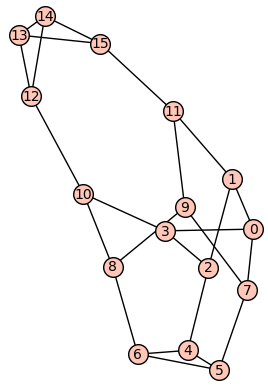

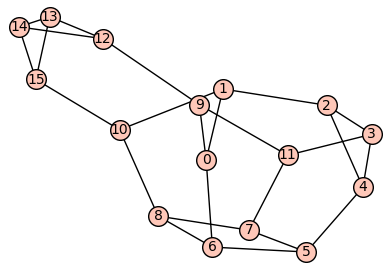

cospectral in regards to ihara matrices


In [24]:
#testing cospectral 3-regular graphs on 16 vertices

g1 = {0:[1,3,7], 2:[3,1,4], 5:[4,6,7], 6:[4,8], 9:[8,7,11], 10:[3,8,12], 11:[1,15], 13:[12,14,15], 14:[12,15],}
g2 = {0:[1,6,9], 2:[1,3,4], 3:[4,11], 5:[4,6,7], 8:[6,7,10], 9:[11,12], 10:[1,15], 11:[7], 13:[12,14,15], 14:[12,15]}
g1 = Graph(g1)
g2 = Graph(g2)
are_cospectral(g1,g2)

In [4]:
#using cospectral_graphs() built in function to find cospectral graphs
gen = graphs.nauty_geng("12 -d3 -D3")
len(list(gen))
#g = graphs.cospectral_graphs(12, graphs=graphs.nauty_geng(12, -d3, -D3))

94

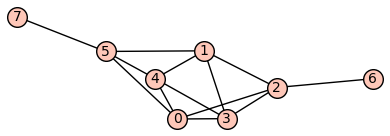

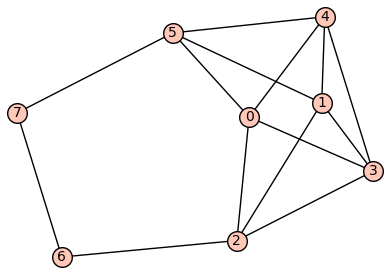

[3.780800801623442?, 1.246979603717467?, 0.4952660978202098?, 0, -0.4450418679126288?, -0.8984559940154224?, -1.801937735804839?, -2.377610905428230?]
[3.805517942736874?, 1.248485253512700?, 1, 0, -0.7220637129691248?, -1, -2, -2.331939483280449?]
NOT cospectral in regards to non-backtracking matrices
NOT cospectral in regards to ihara matrices


In [59]:
g1 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7]}
g1 = Graph(g1)
show(g1)
g2 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7], 6:[7]}
g2 = Graph(g2)
show(g2)
print(g1.spectrum())
print(g2.spectrum())
are_cospectral(g1,g2)

In [30]:
#These are two really big bi-regular graphs that are supposed to be cospectral. I screwed it up though

g1 = {0:[1,5,15], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 14:[13,16,22], 16:[17,33], 17:[15,18], 18:[19,48], 19:[20,49], 20:[21,50], 21:[22,53], 23:[15,22,23], 24:[25,48], 25:[26,49], 26:[27,50], 27:[28,53], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[33,38], 33:[47], 34:[39,41], 35:[42,40], 36:[39,43], 37:[40,44], 38:[39,45], 47:[40,46], 41:[42,46], 43:[42,44], 45:[44,46], 51:[48,50,52], 52:[49,53]}
g1 = Graph(g1)
g2 = {0:[1,5,33], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 13:[34], 15:[16,32,47], 16:[17,48], 17:[18,49], 18:[19,50], 19:[20,51], 20:[21,52], 21:[22,47], 22:[23,48], 23:[24,49], 24:[25,50], 25:[26,51], 26:[27,52], 27:[28,33], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[38], 41:[33,42,46], 42:[34,43], 43:[35,44], 44:[36,45], 45:[37,46], 46:[38], 39:[35,37,40], 40:[36,38], 53:[47,49,51], 54:[48,50,52]}
g2 = Graph(g2)
print(g1.adjacency_matrix().eigenvalues() == g2.adjacency_matrix().eigenvalues())

False
